# Ejercicios

## Ejercicio 1

Crear una función que muestre una imagen en pantalla

```{admonition} Solución
:class: dropdown

```python
import matplotlib.pyplot as plt

def imshow(title, img):
    plt.figure()
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    plt.title(title)
    plt.axis('off')

```

## Ejercicio 2

Crear una función que transforme el espacio BGR<->RGB sin usar `cvtColor`

```{admonition} Solución
:class: dropdown

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

def bgr2rgb(brg_img: np.array) -> np.array:
   blue, green, red = cv2.split(brg_img)
   return cv2.merge([red,green,blue])

def rgb2bgr(brg_img: np.array) -> np.array:
   blue, green, red = cv2.split(brg_img)
   return cv2.merge([blue,green,red])

```

## Ejercicio 3

1. Crear una función que transforme el espacio RGB->HSV sin usar `cvtColor`
2. Mostrar cada uno de los canales HSV de una imagen cualquiera obtenidos por dicha función 
3. Comprobar el error entre el método manual y el ofrecido por `cvtColor` para dicha imagen


```{admonition} Solución
:class: dropdown

**RGB → HSV**
- **V (Value)**: Es simplemente el máximo de R, G, B.
- **S (Saturation)**: Mide cuán "puro" es el color. Si todos los canales son iguales (gris), S = 0.
- **H (Hue)**: Representa el ángulo en el círculo cromático. Se calcula según qué canal es el máximo (R, G o B) y la diferencia relativa entre los otros dos.

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

######### FUNCIÓN DE CAMBIO ESPACIO COLOR ############
def rgb2hsv(imagen:np.array)->np.array:
    
    # Normalizar matriz entrada en [0,1] y dtype float32
    if imagen.dtype == np.uint8:
       rgb = imagen.astype(np.float32) / 255.0
    else:
       rgb = imagen.astype(np.float32)

    # Separación de canales
    r = rgb[:,:,0]
    g = rgb[:,:,1]
    b = rgb[:,:,2]

    # Calcular valor máximo maximo tres canales
    M = np.max(rgb, axis=2)

    # Calcular valor mínimo tres canales
    m = np.min(rgb, axis=2)

    # Calcular Delta
    delta = (M - m) + 1e-10 # sumamos cantidad infinitesimal para evitar divisiones por 0
    

    # Calcular Value (V)
    # V = M -> max(R,G,B)
    V = M

    # Iniciar matrices para H y S
    H = np.zeros_like(V)
    S = np.zeros_like(V)

    # Calcular saturación (S)
    # Para evitar divisiones por cero sumamos una cantidad infinitesimal
    S = np.where(M==0, 0, delta/(M + 1e-10))

    # Calcular matiz (H)
    # 1) definimos una máscara booleana para indicar color NO es gris (delta = 0)
    #    para ello imponemos la condición de que sea mayor que el valor infinitesimal
    #    sumado.
    mask = ( delta > 1e-10 ) 

    # 2) aplicamos las transfomadas para canal R, G, B
    # 2a) Canal R
    idx = ((M == r) & mask)
    H[idx] = ((g[idx]-b[idx])/delta[idx]) % 6
    # 2b) Canal G
    idx = ((M == g) & mask)
    H[idx] = ( (b[idx] - r[idx]) / delta[idx] ) + 2.0
    # 2c) Canal B
    idx = ((M == b) & mask)
    H[idx] = ( (r[idx] - g[idx]) / delta[idx] ) + 4.0

    # 3) Normalizamos (H) a [0,1] (dividir por 360)
    H = H * 60 / 360

    # Construimos imagen HSV como float32
    hsv = np.dstack([H,S,V]).astype(np.float32)

    return hsv

###### VISUALIZACIÓN DE CANALES #####

img_bgr = cv2.imread("../img/imagen_1.jpg",cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
hsv_manual = rgb2hsv(img_rgb)

# Visualización de H, S, V (hsv_manual)
fig, axes = plt.subplots(1, 3, figsize=(16, 8))
axes[0].imshow((hsv_manual[...,0]*255).astype(np.uint8), cmap='gray')
axes[0].set_title('H - Matiz')
axes[0].axis('off')

axes[1].imshow((hsv_manual[...,1]*255).astype(np.uint8), cmap='gray')
axes[1].set_title('S - Saturación')
axes[1].axis('off')

axes[2].imshow((hsv_manual[...,2]*255).astype(np.uint8), cmap='gray')
axes[2].set_title('V - Luminosidad')
axes[2].axis('off')

plt.tight_layout()
plt.show()

###### CÁLCULO DEL ERROR ######

# OpenCV en uint8 -> convertimos a float [0,1] para comparar
hsv_cv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV).astype(np.float32)
hsv_cv[...,0] = hsv_cv[...,0] / 179.0  # H
hsv_cv[...,1] = hsv_cv[...,1] / 255.0  # S
hsv_cv[...,2] = hsv_cv[...,2] / 255.0  # V

# Error promedio
mae = np.mean(np.abs(hsv_manual - hsv_cv))
print("Error medio absoluto (HSV manual vs OpenCV):", float(mae))
```

## Ejercicio 4

1. Crear lainversa a la del ejercicio 3, es decir que transforme el espacio HSV->RGB sin usar `cvtColor`
2. Mostrar cada uno de los canales RGB de una imagen cualquiera obtenidos con dicha función
3. Comprobar el error entre el método manual y el ofrecido por `cvtColor` para dicha imagen


```{admonition} Solución
:class: dropdown

En el modelo HSV:

- **H (Matiz)** es un ángulo en el círculo cromático: **0° a 360°**.
- Este círculo se divide naturalmente en **6 sectores de 60°** cada uno, porque hay **3 colores primarios (R, G, B)** y **3 secundarios (C, M, Y)**:

Sector | Rango H (°) | Color dominante
-------|-------------|------------------
0      |   0 – 60    | Rojo → Amarillo
1      |  60 – 120   | Verde ← Amarillo
2      | 120 – 180   | Verde → Cian
3      | 180 – 240   | Azul ← Cian
4      | 240 – 300   | Azul → Magenta
5      | 300 – 360   | Rojo ← Magenta

En cada sector, **uno de los canales RGB es máximo**, otro es **intermedio**, y el tercero es **mínimo (0)**.

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

######### FUNCIÓN DE CAMBIO ESPACIO COLOR ############
def hsv2rgb(imagen:np.array)->np.array:

    # Obtención de los canales HSV
    H, S, V = imagen[:,:,0], imagen[:,:,1], imagen[:,:,2]

    # Normalizar H a [0, 1)
    if H.max() > 1:
        H = H / 180.0  # OpenCV usa [0,180)

    # Normalizar S y V a [0,1] si están en [0,255]
    if S.max() > 1 or V.max() > 1:
        S = S / 255.0
        V = V / 255.0

    # Normalizar H a [0, 6) para facilitar cálculos (6 sectores de 60°)
    H = H * 6

    # Calcular componentes intermedios
    C = V * S          # cromática
    X = C * (1 - np.abs((H % 2) - 1))  # componente secundaria
    m = V - C          # componente de brillo base

    # Inicializar matriz RGB
    R = np.zeros_like(H, dtype=np.float32)
    G = np.zeros_like(H, dtype=np.float32)
    B = np.zeros_like(H, dtype=np.float32)

    # Definición de seis sectores
    s0 = (0 <= H) & (H < 1)
    s1 = (1 <= H) & (H < 2)
    s2 = (2 <= H) & (H < 3)
    s3 = (3 <= H) & (H < 4)
    s4 = (4 <= H) & (H < 5)
    s5 = (5 <= H) & (H < 6)

    # Creación de componentes RGB
    R[s0], G[s0], B[s0] = C[s0], X[s0], 0.0
    R[s1], G[s1], B[s1] = X[s1], C[s1], 0.0
    R[s2], G[s2], B[s2] = 0.0, C[s2], X[s2]
    R[s3], G[s3], B[s3] = 0.0, X[s3], C[s3]
    R[s4], G[s4], B[s4] = X[s4], 0.0, C[s4]
    R[s5], G[s5], B[s5] = C[s5], 0.0, X[s5]

    # Añadir el componente m (brillo base)
    R = R + m
    G = G + m
    B = B + m

    # Generar imagen (matriz) RGB
    rgb = np.stack([R, G, B], axis=-1)

    # Aseguramos que los valores estén entre 0-1
    rgb = np.clip(rgb, 0, 1)  # por seguridad

    #Transformar el dtype a uint8
    rgb = (np.round(rgb * 255)).astype(np.uint8)
    
    return rgb

###### VISUALIZACIÓN DE CANALES #####

img_bgr = cv2.imread("../img/imagen_1.jpg",cv2.IMREAD_COLOR)
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
rgb_manual = hsv2rgb(img_hsv)
#img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Visualización de H, S, V (hsv_manual)
fig, axes = plt.subplots(1, 4, figsize=(16, 8))
axes[0].imshow(rgb_manual[...,0], cmap='gray')
axes[0].set_title('R - Rojo')
axes[0].axis('off')

axes[1].imshow(rgb_manual[...,1], cmap='gray')
axes[1].set_title('G - Verde')
axes[1].axis('off')

axes[2].imshow(rgb_manual[...,2], cmap='gray')
axes[2].set_title('B - Azul')
axes[2].axis('off')

axes[3].imshow(rgb_manual)
axes[3].set_title('RGB')
axes[3].axis('off')

plt.tight_layout()
plt.show()

###### CÁLCULO DEL ERROR ######
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
rgb_cv = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
rgb_manual = hsv2rgb(img_hsv)

# Cálculo del error
diff = rgb_manual.astype(np.float32) - rgb_cv.astype(np.float32)
abs_diff = np.abs(diff)

mae = np.mean(abs_diff)
max_error = np.max(abs_diff)
mse = np.mean(diff ** 2)

print(f"Error medio absoluto (MAE): {mae:.4f}")
print(f"Error máximo por píxel: {max_error:.2f}")
print(f"Error cuadrático medio (MSE): {mse:.4f}")

# ¿Son visualmente idénticas?
print(f"¿Todas las diferencias ≤ 1? {np.all(abs_diff <= 1)}")
```

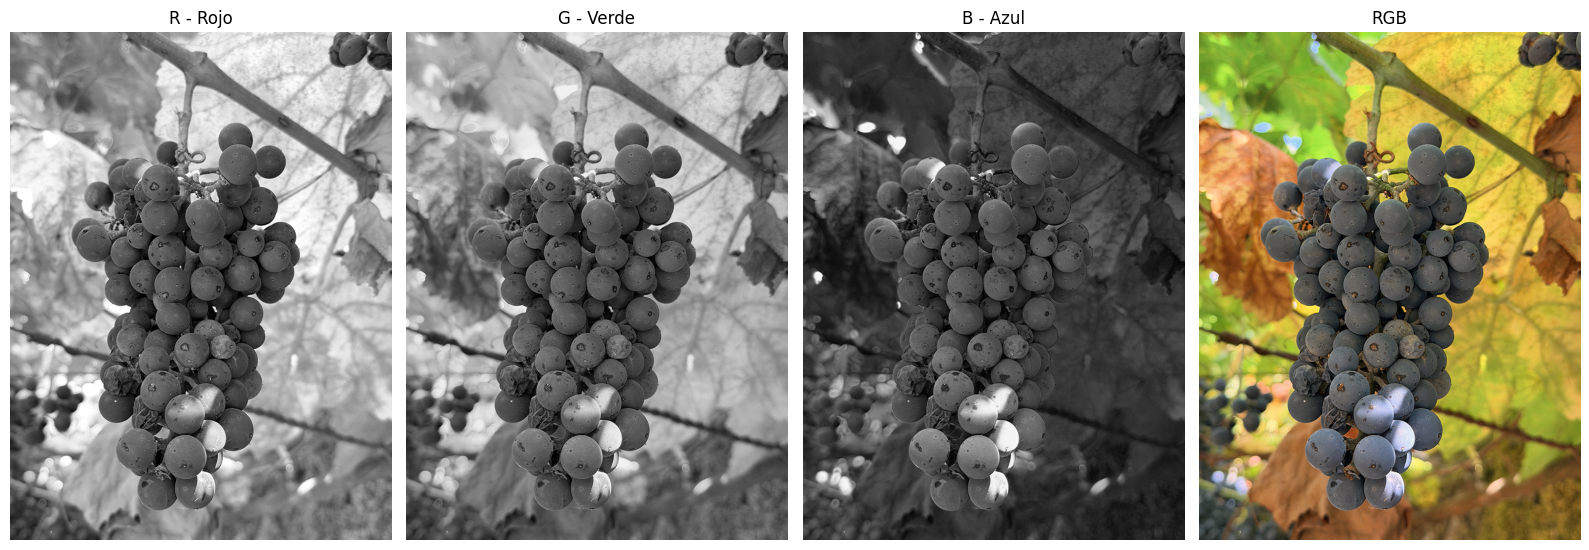

Error medio absoluto (MAE): 0.3199
Error máximo por píxel: 1.00
Error cuadrático medio (MSE): 0.3199
¿Todas las diferencias ≤ 1? True


In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

######### FUNCIÓN DE CAMBIO ESPACIO COLOR ############
def hsv2rgb(imagen:np.array)->np.array:

    # Obtención de los canales HSV
    H, S, V = imagen[:,:,0], imagen[:,:,1], imagen[:,:,2]

    # Normalizar H a [0, 1)
    if H.max() > 1:
        H = H / 180.0  # OpenCV usa [0,180)

    # Normalizar S y V a [0,1] si están en [0,255]
    if S.max() > 1 or V.max() > 1:
        S = S / 255.0
        V = V / 255.0

    # Normalizar H a [0, 6) para facilitar cálculos (6 sectores de 60°)
    H = H * 6

    # Calcular componentes intermedios
    C = V * S          # cromática
    X = C * (1 - np.abs((H % 2) - 1))  # componente secundaria
    m = V - C          # componente de brillo base

    # Inicializar matriz RGB
    R = np.zeros_like(H, dtype=np.float32)
    G = np.zeros_like(H, dtype=np.float32)
    B = np.zeros_like(H, dtype=np.float32)

    # Definición de seis sectores
    s0 = (0 <= H) & (H < 1)
    s1 = (1 <= H) & (H < 2)
    s2 = (2 <= H) & (H < 3)
    s3 = (3 <= H) & (H < 4)
    s4 = (4 <= H) & (H < 5)
    s5 = (5 <= H) & (H < 6)

    # Creación de componentes RGB
    R[s0], G[s0], B[s0] = C[s0], X[s0], 0.0
    R[s1], G[s1], B[s1] = X[s1], C[s1], 0.0
    R[s2], G[s2], B[s2] = 0.0, C[s2], X[s2]
    R[s3], G[s3], B[s3] = 0.0, X[s3], C[s3]
    R[s4], G[s4], B[s4] = X[s4], 0.0, C[s4]
    R[s5], G[s5], B[s5] = C[s5], 0.0, X[s5]

    # Añadir el componente m (brillo base)
    R = R + m
    G = G + m
    B = B + m

    # Generar imagen (matriz) RGB
    rgb = np.stack([R, G, B], axis=-1)

    # Aseguramos que los valores estén entre 0-1
    rgb = np.clip(rgb, 0, 1)  # por seguridad

    #Transformar el dtype a uint8
    rgb = (np.round(rgb * 255)).astype(np.uint8)
    
    return rgb

###### VISUALIZACIÓN DE CANALES #####

img_bgr = cv2.imread("../img/imagen_1.jpg",cv2.IMREAD_COLOR)
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
rgb_manual = hsv2rgb(img_hsv)
#img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Visualización de H, S, V (hsv_manual)
fig, axes = plt.subplots(1, 4, figsize=(16, 8))
axes[0].imshow(rgb_manual[...,0], cmap='gray')
axes[0].set_title('R - Rojo')
axes[0].axis('off')

axes[1].imshow(rgb_manual[...,1], cmap='gray')
axes[1].set_title('G - Verde')
axes[1].axis('off')

axes[2].imshow(rgb_manual[...,2], cmap='gray')
axes[2].set_title('B - Azul')
axes[2].axis('off')

axes[3].imshow(rgb_manual)
axes[3].set_title('RGB')
axes[3].axis('off')

plt.tight_layout()
plt.show()

###### CÁLCULO DEL ERROR ######
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
rgb_cv = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
rgb_manual = hsv2rgb(img_hsv)

# Cálculo del error
diff = rgb_manual.astype(np.float32) - rgb_cv.astype(np.float32)
abs_diff = np.abs(diff)

mae = np.mean(abs_diff)
max_error = np.max(abs_diff)
mse = np.mean(diff ** 2)

print(f"Error medio absoluto (MAE): {mae:.4f}")
print(f"Error máximo por píxel: {max_error:.2f}")
print(f"Error cuadrático medio (MSE): {mse:.4f}")

# ¿Son visualmente idénticas?
print(f"¿Todas las diferencias ≤ 1? {np.all(abs_diff <= 1)}")